<h2>F1 Data Analysis - Portfolio project</h2><br>

Name: Uros Nikolic <br>
Description: F1 Analysis based of 70 years of data<br>

<p><span>In this project, I am going to show all the skills that I have gained through the Codecademy Introduction to Data Science/ML fundamentals course. First of all, I have obtained the basic knowledge of how to describe the data and its features around and how to find the right dataset that would explain the answer all my questions that I want to learn from this dataset. Getting to know the dataset has opened a new door for me that showed me how to manipulate the data with NumPy and Pandas libraries alongside visual representation libraries like Seaborn library and Matplotlib. In order to make this Portfolio project more complex, I am going to add a few Classification algorithms to show my skills and knowledge obtained in the Data Mining and Knowledge Disclosure course studied at the Stevens Institute of Technology.<span></p>

<h3>What we are trying to find out from data gathered over 70 years of F1 history:</h3>
<p>Where do the best drivers come from? Do most of them live in the same country?</p>
<p>What was the most entertaining season so far and why?</p>
<p>Which driver was the most consistent at the top from the beginning of Formula One and why?</p>
<p>Who was the most dominant constructor in 70 years?</p>

In [4]:
import numpy as np
import pandas as pa
import seaborn as sea
import matplotlib.pyplot as plt
from collections import Counter

circuits = pa.read_csv("circuits.csv")
constructor_results = pa.read_csv("constructor_results.csv")
constructor_standings = pa.read_csv("constructor_standings.csv")
constructors = pa.read_csv("constructors.csv")
driver_standings = pa.read_csv("driver_standings.csv")
drivers = pa.read_csv("drivers.csv")
lap_times = pa.read_csv("lap_times.csv")
pit_stops = pa.read_csv("pit_stops.csv")
qualifying = pa.read_csv("qualifying.csv")
races = pa.read_csv("races.csv")
results = pa.read_csv("results.csv")
seasons = pa.read_csv("seasons.csv")
sprint_results = pa.read_csv("sprint_results.csv")
status = pa.read_csv("status.csv")

results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26514,26520,1132,839,214,31,18,16,16,16,0.0,50,\N,\N,46,16,1:30.875,233.371,12
26515,26521,1132,815,9,11,0,17,17,17,0.0,50,\N,\N,50,6,1:29.707,236.409,12
26516,26522,1132,855,15,24,14,18,18,18,0.0,50,\N,\N,43,17,1:31.014,233.014,12
26517,26523,1132,847,131,63,1,\N,R,19,0.0,33,\N,\N,3,19,1:31.298,232.289,34


<h3>We wanted to learn, where do the F1 drivers mostly come from</h3>

In [168]:
# Getting the number of the driversand their nationality 

drivers = drivers.drop_duplicates()

nationality = drivers['nationality']

nationality_counts = Counter(nationality).most_common()

for country, numOfDrivers in nationality_counts:
    print(f"Country: {country} , number of drivers: {numOfDrivers}")

Country: British , number of drivers: 166
Country: American , number of drivers: 158
Country: Italian , number of drivers: 99
Country: French , number of drivers: 73
Country: German , number of drivers: 50
Country: Brazilian , number of drivers: 32
Country: Argentine , number of drivers: 24
Country: Swiss , number of drivers: 23
Country: Belgian , number of drivers: 23
Country: South African , number of drivers: 23
Country: Japanese , number of drivers: 20
Country: Australian , number of drivers: 18
Country: Dutch , number of drivers: 18
Country: Spanish , number of drivers: 15
Country: Austrian , number of drivers: 15
Country: Canadian , number of drivers: 14
Country: Swedish , number of drivers: 10
Country: New Zealander , number of drivers: 10
Country: Finnish , number of drivers: 9
Country: Mexican , number of drivers: 6
Country: Irish , number of drivers: 5
Country: Danish , number of drivers: 5
Country: Portuguese , number of drivers: 4
Country: Monegasque , number of drivers: 4


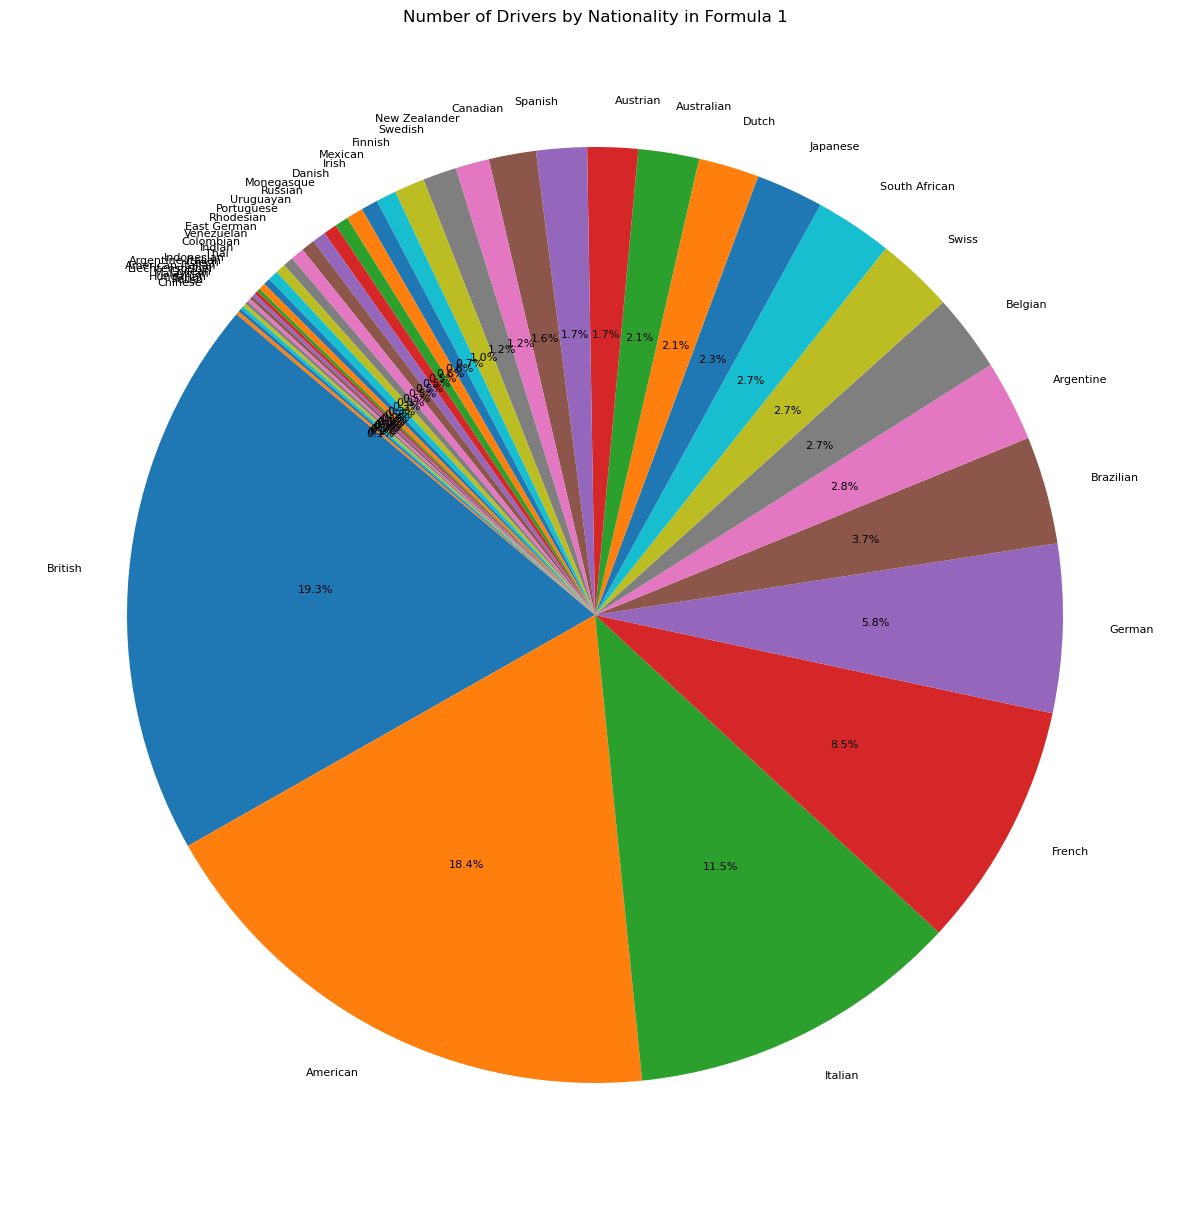

In [162]:
# Now we are going to plot the visual representation of the this data

nationalities = drivers['nationality'].value_counts()

plt.figure(figsize=(12, 14))
plt.pie(
    nationalities.values,  
    labels=nationalities.index,
    autopct='%1.1f%%',  # Percentage format
    startangle=140,  # Starting angle
    textprops={'fontsize': 8}  
)
plt.title("Number of Drivers by Nationality in Formula 1")
plt.tight_layout()
plt.show()

<p> In the pie chart above, we can see how the drives are distributed by their nationality. Most of the drivers are coming from Europe and American continets where the most races are taking place. On the other hand, we can see the split between the rest of 38% of the pie chart that there are some drivers who are coming from Asia, Latin America and some Ocenia countries where some races are taking place, overall, the drivers who have become the Forumula 1 drivers are coming from all sides of the world. </p>

<h3>The most entertaining season so far</h3>

In [30]:
# Merging races with results and seasons.

seasons = seasons.dropna()
races = races.dropna()
results = results.dropna()

season = pa.merge(seasons, races, on='year', how='outer')

entertainingSeason = pa.merge(season, results, on='raceId', how='outer')

entertainingSeason.dropna()

entertainingSeason

,year,url_x,raceId,round,circuitId,name,date,time_x,url_y,fp1_date,...,positionOrder,points,laps,time_y,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...,1,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,...,1.0,10.0,58.0,1:34:15.784,5655784,17,3,1:28.020,216.891,1.0
1,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...,1,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,...,2.0,8.0,58.0,+0.807,5656591,43,14,1:29.066,214.344,1.0
2,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...,1,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,...,3.0,6.0,58.0,+1.604,5657388,50,10,1:28.916,214.706,1.0
3,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...,1,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,...,4.0,5.0,58.0,+4.435,5660219,53,6,1:28.416,215.920,1.0
4,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...,1,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,...,5.0,4.0,58.0,+4.879,5660663,53,9,1:28.712,215.199,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26526,2024,https://en.wikipedia.org/wiki/2024_Formula_One...,1140,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...,2024-10-25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26527,2024,https://en.wikipedia.org/wiki/2024_Formula_One...,1141,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26528,2024,https://en.wikipedia.org/wiki/2024_Formula_One...,1142,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26529,2024,https://en.wikipedia.org/wiki/2024_Formula_One...,1143,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...,2024-11-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
